# Example EDA of toxicity annotation dataset

## Step 1: Download datasets

## Objective

I want to explore two questions using the data in these datasets. Both questions consider possible gender differences in the way the crowdworkers interpreted the Talk Page comments. One of the alleged differencs between men and women is that woman report higher Aggreeableness scores in measures of the Big Five personality traits. Another is that women have greater empathy than men. (See references below.)

-  Could these alleged differences be reflected in women having greater sensitivity than men _in detecting_ instances of aggression or toxicity in the Talk Page comments? 
-  Could these alleged differences be reflected in women having greater sensitivity than men _to the level_ of aggression or toxicity in the Talk Page comments?

## References

- Weisberg, Yanna J et al. “Gender Differences in Personality across the Ten Aspects of the Big Five.” Frontiers in psychology vol. 2 178. 1 Aug. 2011, [doi:10.3389/fpsyg.2011.00178](https://dx.doi.org/10.3389%2Ffpsyg.2011.00178)
- Christov-Moore, Leonardo et al. “Empathy: gender effects in brain and behavior.” Neuroscience and biobehavioral reviews vol. 46 Pt 4, Pt 4 (2014): 604-27, [doi:10.1016/j.neubiorev.2014.09.001](https://dx.doi.org/10.1016%2Fj.neubiorev.2014.09.001).
- Mestre, María Vicenta, et al. “Are Women More Empathetic than Men? A Longitudinal Study in Adolescence.” The Spanish Journal of Psychology, vol. 12, no. 1, 2009, pp. 76–83., [doi:10.1017/S1138741600001499](https://doi.org/10.1017/S1138741600001499).



# Import required libraries and modules

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

## Load and inspect aggression tables using pandas

In [2]:
aggression_annotations = pd.read_csv("aggression_annotations.tsv", delimiter="\t")
aggression_annotated_comments = pd.read_csv("aggression_annotated_comments.tsv", delimiter="\t")
aggression_worker_demographics = pd.read_csv("aggression_worker_demographics.tsv", delimiter="\t")

Briefly inspect the annotation and demographic tables.

In [65]:
aggression_annotations.shape

(1365217, 4)

In [66]:
aggression_annotations.head()

,rev_id,worker_id,aggression,aggression_score
0,37675,1362,1.0,-1.0
1,37675,2408,0.0,1.0
2,37675,1493,0.0,0.0
3,37675,1439,0.0,0.0
4,37675,170,0.0,0.0


In [67]:
aggression_worker_demographics.shape

(2190, 5)

In [5]:
aggression_worker_demographics.head()

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs


## Join annotation table to demographics table

In [6]:
joined_annotations = pd.merge( aggression_annotations, aggression_worker_demographics, left_on="worker_id", right_on="worker_id")

In [7]:
joined_annotations.shape

(855514, 8)

In [8]:
joined_annotations.head()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,male,0,18-30,masters
1,3202092,1362,0.0,0.0,male,0,18-30,masters
2,4745553,1362,0.0,0.0,male,0,18-30,masters
3,4855563,1362,0.0,0.0,male,0,18-30,masters
4,8350378,1362,0.0,0.0,male,0,18-30,masters


**Note:** In the merge, we seem to have lost a large number (37%) of the records. 

In [73]:
num_records_dropped = aggression_annotations.shape[0] - joined_annotations.shape[0]
percent_records_dropped = ( num_records_dropped / aggression_annotations.shape[0] ) * 100

num_records_dropped, percent_records_dropped

(509703, 37.33494382211766)

Filter on only the male workers.

In [9]:
male_joined_annotations = joined_annotations[ ( joined_annotations.gender == "male" ) ]

In [10]:
male_joined_annotations.shape

(547328, 8)

In [11]:
male_joined_annotations.head()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,male,0,18-30,masters
1,3202092,1362,0.0,0.0,male,0,18-30,masters
2,4745553,1362,0.0,0.0,male,0,18-30,masters
3,4855563,1362,0.0,0.0,male,0,18-30,masters
4,8350378,1362,0.0,0.0,male,0,18-30,masters


In [12]:
male_joined_annotations.tail()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
855508,270016254,3964,0.0,0.0,male,0,Under 18,some
855509,281960519,3964,0.0,1.0,male,0,Under 18,some
855510,289741535,3964,1.0,-1.0,male,0,Under 18,some
855511,392852210,3964,0.0,0.0,male,0,Under 18,some
855512,538094319,3964,0.0,0.0,male,0,Under 18,some


Text(0.5, 1.0, 'Males: aggression score')

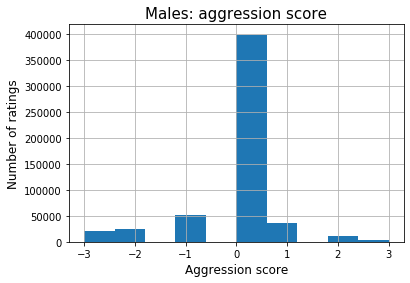

In [13]:
male_joined_annotations[ 'aggression_score' ].hist()
plt.ylabel("Number of ratings",fontsize=12)
plt.xlabel("Aggression score",fontsize=12)
plt.title('Males: aggression score', fontsize=15)

### Interlude: Order the levels on the x-axis of the histograms for categorical variables

For the education and age histograms, I needed to engage in some _gymnastics_ in order for the values on the x-axis to come out in a reasonable order. The process involves creating a mapping between the levels of the columns and an ordered set of non-negative integers. Then we use that mapping to create an additional column in the dataframe that we can use to sort the levels.

In [46]:
edu_groups = ['none', 'some', 'hs', 'bachelors', 'masters', 'professional', 'doctorate']
mapping = {edu_map: i for i, edu_map in enumerate(edu_groups)}
#
# Here is what the mapping looks like.
#
mapping

{'none': 0,
 'some': 1,
 'hs': 2,
 'bachelors': 3,
 'masters': 4,
 'professional': 5,
 'doctorate': 6}

In [34]:
edu_map = male_joined_annotations['education'].map(mapping)
#
# Here is the result of running the mapping on the 'education' column
#
edu_map

0         4
1         4
2         4
3         4
4         4
         ..
855508    1
855509    1
855510    1
855511    1
855512    1
Name: education, Length: 547328, dtype: int64

In [39]:
#
# The series has the name of the column that we mapped from. In this case, 'education'.
# Need to change that so we don't end up with two columns named 'education' in the dataframe.
#
edu_map = edu_map.rename( 'edu_sort')

Text(0.5, 1.0, 'Males: education')

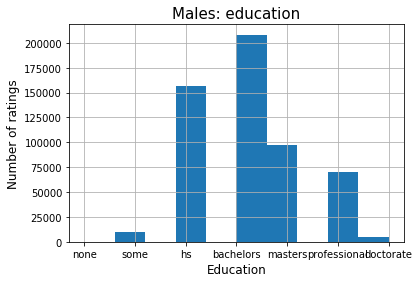

In [41]:
pd.concat( [male_joined_annotations, edu_map ], axis = 1).sort_values( by = 'edu_sort')[ 'education' ].hist()
plt.ylabel("Number of ratings",fontsize=12)
plt.xlabel("Education",fontsize=12)
plt.title('Males: education', fontsize=15)

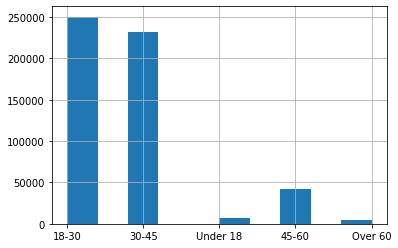

In [15]:
male_joined_annotations[ 'age_group' ].hist()

We use the following code to enable ordering the columns of the histogram in a reasonable way. For more detail, see the proceeding discussion regarding the 'education' column.

In [42]:
age_groups = ['Under 18', '18-30', '30-45', '45-60', 'Over 60']
mapping = {age_map: i for i, age_map in enumerate( age_groups )}
age_map = male_joined_annotations[ 'age_group' ].map( mapping )
age_map = age_map.rename( 'age_sort' )

Text(0.5, 1.0, 'Males: age')

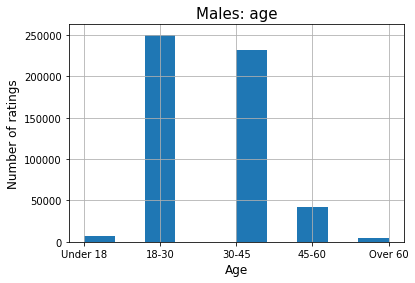

In [45]:
pd.concat( [male_joined_annotations, age_map ], axis = 1).sort_values( by = 'age_sort')[ 'age_group' ].hist()
plt.ylabel("Number of ratings",fontsize=12)
plt.xlabel("Age",fontsize=12)
plt.title('Males: age', fontsize=15)

## Basic EDA

At this point you start asking question.

I can calculate the average score per worker - that worker's "toxicity bias". Is this different for different age groups?

In [ ]:
avg_worker_aggression = joined_annotations.groupby("worker_id")["aggression_score"].mean()
aggression_worker_demographics = aggression_worker_demographics.join( avg_worker_aggression )

Take a quick look at our newly augmented table.

In [ ]:
aggression_worker_demographics.head()

Now let's compute an average toxicity statistic for each group...

In [ ]:
aggression_worker_demographics.groupby("age_group").aggression_score.mean()

The "toxicity bias" does vary by group!

We can even plot the distribution of personal biases in each group:

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title("Distribution of worker's mean toxicity rating, by age group")
sns.violinplot( x="aggression_score", y="age_group", data=aggression_worker_demographics, ax=ax )

## A very basic bias question: is the set of annotation workers gender-balanced?

In [ ]:
foo = aggression_worker_demographics.groupby("gender").worker_id.count()
foo/foo.sum()

The answer is **no** - 64.8% of annotators are male.

## Is the set of _annotations_ gender-balanced?

In [ ]:
foo = joined_annotations.groupby("gender").rev_id.count()
foo/foo.sum()

Also no, about the same fraction - 64.8% of annotations - were made by male annotators.